In [125]:
# this script builds on Glucose_Time_Series_Forecasting_ML_2 and scales all variables
# using sklearn's minmaxscaler

# it may not look like it at first, but this is currently our best multivariate ML model!
# we need to adjust the parameters (batch size, window length, sample rate, etc) so it has good fit,
# but the architecture is there

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

In [126]:
df = pd.read_csv('/Users/jonathanlifferth/PycharmProjects/longevity_solutions_ml/0_master_df.csv')
df = df.drop(columns=['Unnamed: 0'])

In [127]:
# df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.drop_duplicates(subset=['datetime'])

df = df.groupby('datetime').mean()

df

,HR,glucose,Vertical,Lateral,Sagittal
datetime,,,,,
2014-10-01 19:14:00,65.016667,185.4,1978.67,2052.35,2096.99
2014-10-01 19:19:00,75.750000,178.2,1970.75,2051.55,2084.16
2014-10-01 19:23:00,64.366667,169.2,1985.00,2000.63,2010.85
2014-10-01 19:24:00,92.000000,176.4,1965.40,2037.60,2064.48
2014-10-01 19:29:00,91.366667,172.8,1964.49,2024.65,2049.32
...,...,...,...,...,...
2014-10-04 13:04:00,78.300000,72.0,1987.56,2067.79,2099.19
2014-10-04 13:09:00,53.238095,79.2,1968.38,2004.64,2055.26
2014-10-04 13:19:00,34.125000,97.2,1965.81,2018.09,2057.95


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '2014-10-03 18:24:00'),
  Text(0.0, 0, '2014-10-01 19:14:00'),
  Text(50.0, 0, '2014-10-02 12:04:00'),
  Text(100.0, 0, '2014-10-02 16:39:00'),
  Text(150.0, 0, '2014-10-02 21:39:00'),
  Text(200.0, 0, '2014-10-03 10:39:00'),
  Text(250.0, 0, '2014-10-03 16:29:00'),
  Text(300.0, 0, '2014-10-04 10:29:00'),
  Text(350.0, 0, '')])

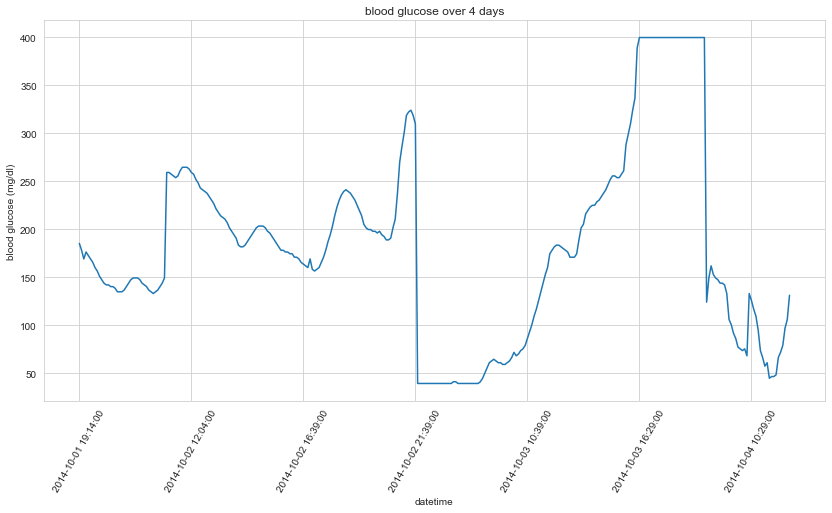

In [128]:
df['glucose'].plot(figsize=(14,7))
plt.title('blood glucose over 4 days')
plt.ylabel('blood glucose (mg/dl)')
sns.set_style('whitegrid')
plt.xticks(rotation=60)

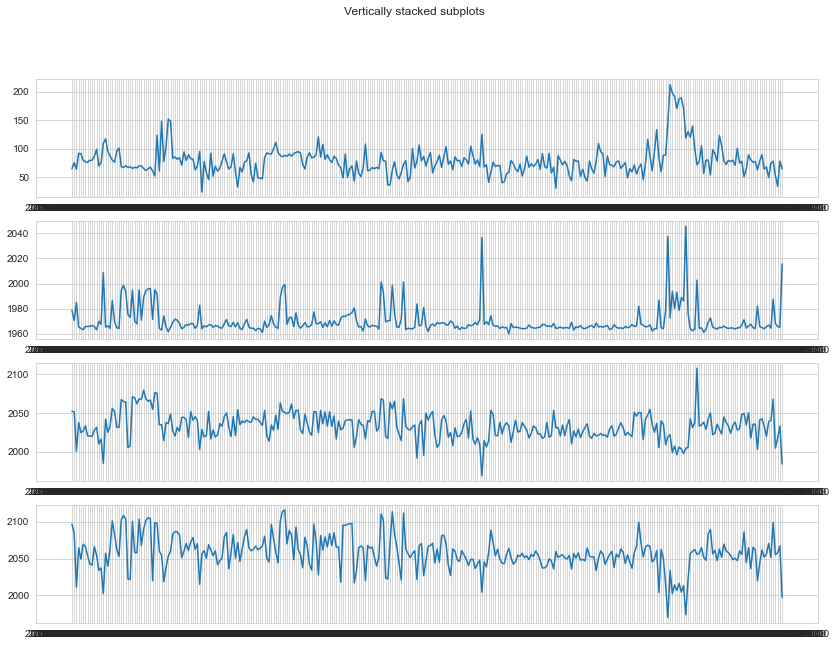

In [130]:
fig, axs = plt.subplots(4, figsize=(14,10))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df.HR)
axs[1].plot(df.Vertical)
axs[2].plot(df.Lateral)
axs[3].plot(df.Sagittal)
# df.datetime, 

In [134]:
# df_2 = df.set_index('datetime')
df_2 = df
df_2

,HR,glucose,Vertical,Lateral,Sagittal
datetime,,,,,
2014-10-01 19:14:00,65.016667,185.4,1978.67,2052.35,2096.99
2014-10-01 19:19:00,75.750000,178.2,1970.75,2051.55,2084.16
2014-10-01 19:23:00,64.366667,169.2,1985.00,2000.63,2010.85
2014-10-01 19:24:00,92.000000,176.4,1965.40,2037.60,2064.48
2014-10-01 19:29:00,91.366667,172.8,1964.49,2024.65,2049.32
...,...,...,...,...,...
2014-10-04 13:04:00,78.300000,72.0,1987.56,2067.79,2099.19
2014-10-04 13:09:00,53.238095,79.2,1968.38,2004.64,2055.26
2014-10-04 13:19:00,34.125000,97.2,1965.81,2018.09,2057.95


In [33]:
# let's scale our values!!

In [135]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)

In [136]:
df_scaled

,HR,glucose,Vertical,Lateral,Sagittal
0,0.216026,0.405,0.217559,0.599006,0.869126
1,0.273217,0.385,0.124722,0.593241,0.781489
2,0.212563,0.360,0.291759,0.226329,0.280738
3,0.359802,0.380,0.062009,0.492722,0.647063
4,0.356427,0.370,0.051342,0.399409,0.543511
...,...,...,...,...,...
313,0.286804,0.090,0.321768,0.710261,0.884153
314,0.153266,0.110,0.096941,0.255224,0.584085
315,0.051425,0.160,0.066815,0.352140,0.602459
316,0.286804,0.185,0.063181,0.461162,0.664549


In [137]:
# was thinking of using a TimeseriesGenerator here but for now we're going to stick
# with the old, very long, manual method below

input_data = np.array(df_scaled)

target_data = np.array(df_scaled['glucose'])

# target_data = np.array([df_scaled.HR, df_scaled.glucose, df_scaled.Vertical,
#                       df_scaled.Lateral, df_scaled.Sagittal])
input_data.shape

(318, 5)

In [138]:
generator = TimeseriesGenerator(input_data, target_data, length=12, 
                                sampling_rate=2, batch_size=6)
generator[0]

(array([[[0.2160261 , 0.405     , 0.21755949, 0.59900562, 0.86912568],
         [0.21256269, 0.36      , 0.29175947, 0.22632944, 0.2807377 ],
         [0.35642741, 0.37      , 0.05134216, 0.39940914, 0.54351093],
         [0.28041   , 0.35      , 0.06763568, 0.46404381, 0.66010929],
         [0.29559572, 0.325     , 0.06974563, 0.36828073, 0.49692623],
         [0.3331604 , 0.3       , 0.06658071, 0.42311572, 0.66031421]],
 
        [[0.27321676, 0.385     , 0.1247216 , 0.5932411 , 0.78148907],
         [0.35980201, 0.38      , 0.06200914, 0.49272229, 0.64706284],
         [0.29621736, 0.36      , 0.03692416, 0.41482923, 0.68094262],
         [0.27614734, 0.335     , 0.0677529 , 0.36871307, 0.57438525],
         [0.29568453, 0.31      , 0.07783378, 0.36604698, 0.48702186],
         [0.39878757, 0.29      , 0.0377447 , 0.448984  , 0.57698087]],
 
        [[0.21256269, 0.36      , 0.29175947, 0.22632944, 0.2807377 ],
         [0.35642741, 0.37      , 0.05134216, 0.39940914, 0.54351093],


In [139]:
print('dataset size : %d' % len(generator))

dataset size : 51


In [140]:
for i in range(len(generator)):
    x, y = generator[i]
    print('input:%s to get target: %s' % (x,y))

input:[[[0.2160261  0.405      0.21755949 0.59900562 0.86912568]
  [0.21256269 0.36       0.29175947 0.22632944 0.2807377 ]
  [0.35642741 0.37       0.05134216 0.39940914 0.54351093]
  [0.28041    0.35       0.06763568 0.46404381 0.66010929]
  [0.29559572 0.325      0.06974563 0.36828073 0.49692623]
  [0.3331604  0.3        0.06658071 0.42311572 0.66031421]]

 [[0.27321676 0.385      0.1247216  0.5932411  0.78148907]
  [0.35980201 0.38       0.06200914 0.49272229 0.64706284]
  [0.29621736 0.36       0.03692416 0.41482923 0.68094262]
  [0.27614734 0.335      0.0677529  0.36871307 0.57438525]
  [0.29568453 0.31       0.07783378 0.36604698 0.48702186]
  [0.39878757 0.29       0.0377447  0.448984   0.57698087]]

 [[0.21256269 0.36       0.29175947 0.22632944 0.2807377 ]
  [0.35642741 0.37       0.05134216 0.39940914 0.54351093]
  [0.28041    0.35       0.06763568 0.46404381 0.66010929]
  [0.29559572 0.325      0.06974563 0.36828073 0.49692623]
  [0.3331604  0.3        0.06658071 0.42311572

In [141]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,max_features=5, random_state=1)

In [198]:
# split 70/30 into train and test sets 
input_data_size = int(len(input_data) * 0.7)
set_index = len(input_data) - input_data_size
print(set_index)
X_train,X_test,y_train,y_test=input_data[:-set_index],input_data[-set_index:],target_data[:-set_index],target_data[-set_index:]

96


In [143]:
rf_model.fit(X_train,y_train) # random forest
lin_model.fit(X_train,y_train) # linear regression

LinearRegression()

In [199]:
# unscale y_test for plotting

y_test = y_test.reshape(-1, 1)
print(y_test.shape)

# convert np.array shape from (96,1) to (96,5) so it is compatible with the inverse transform scaler
new_col = y_test.sum(1)[...,None] # None keeps (n, 1) shape
y_test = np.append(y_test, new_col, 1)
y_test = np.append(y_test, new_col, 1)
y_test = np.append(y_test, new_col, 1)
y_test = np.append(y_test, new_col, 1)

y_test.shape

unscale_y_test=scaler.inverse_transform(y_test)

y_test = unscale_y_test[:,0]
y_test

(96, 1)


array([ 94.85230263, 102.35935526, 108.92802632, 110.80478947,
       116.43507895, 118.31184211, 120.18860526, 121.12698684,
       121.12698684, 123.00375   , 123.94213158, 125.81889474,
       127.69565789, 129.57242105, 132.38756579, 135.20271053,
       137.07947368, 137.07947368, 136.14109211, 136.14109211,
       138.01785526, 139.89461842, 153.97034211, 159.60063158,
       165.23092105, 172.73797368, 179.30664474, 206.51971053,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      , 212.15      , 212.15      ,
       212.15      , 212.15      ,  68.57761842,  81.71496053,
        88.28363158,  83.59172368,  81.71496053,  80.77

In [191]:
# prepare to plot random forest regressor
pred=rf_model.predict(X_test)
pred = pred.reshape(-1, 1)
print(pred.shape)

# convert np.array shape from (96,1) to (96,5) so it is compatible with the inverse transform scaler
new_col = pred.sum(1)[...,None] # None keeps (n, 1) shape
pred = np.append(pred, new_col, 1)
pred = np.append(pred, new_col, 1)
pred = np.append(pred, new_col, 1)
pred = np.append(pred, new_col, 1)

print(pred.shape)

unscale_pred=scaler.inverse_transform(pred)

pred = unscale_pred[:,0]
pred.shape

(96, 1)
(96, 5)


(96,)

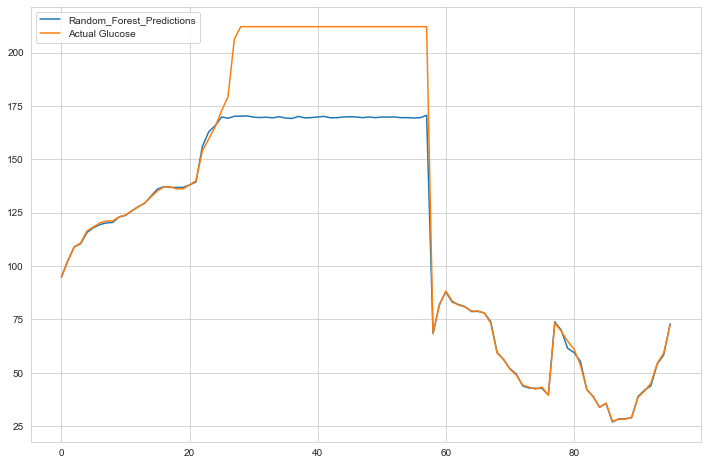

In [200]:
# Random Forest Regressor
# pred=rf_model.predict(X_test)
# pred = pred.reshape(-1, 1)
# unscale_pred=scaler.inverse_transform(pred)
# # unscale_y_test=scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

In [201]:
# prepare to plot Linear Regression
lin_pred=lin_model.predict(X_test)
lin_pred = lin_pred.reshape(-1, 1)
print(lin_pred.shape)

# convert np.array shape from (96,1) to (96,5) so it is compatible with the inverse transform scaler
new_col = lin_pred.sum(1)[...,None] # None keeps (n, 1) shape
lin_pred = np.append(lin_pred, new_col, 1)
lin_pred = np.append(lin_pred, new_col, 1)
lin_pred = np.append(lin_pred, new_col, 1)
lin_pred = np.append(lin_pred, new_col, 1)

print(lin_pred.shape)

unscale_lin_pred=scaler.inverse_transform(lin_pred)

lin_pred = unscale_lin_pred[:,0]
lin_pred.shape

(96, 1)
(96, 5)


(96,)

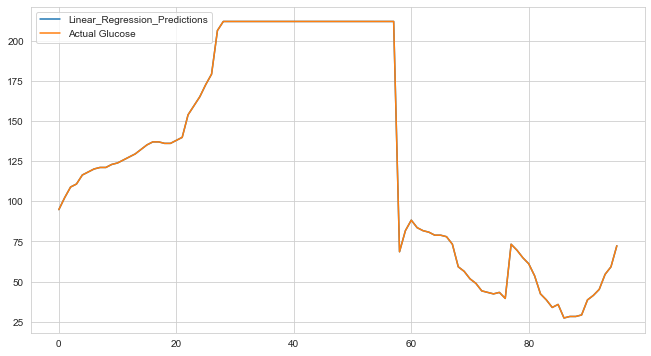

In [202]:
# Linear Regression
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

In [203]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [204]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 24.03425121060188
Mean Squared Error for Linear Regression Model is: 1.758503553725828e-14


In [21]:
# # create time windows
# window_interval = 30 # time in minutes, smallest possible interval is 5 minutes

# # create supervised training column names
# g_frame_1 = 'g_minus_' + str(window_interval)
# g_frame_2 = 'g_minus_' + str(window_interval * 2)
# g_frame_3 = 'g_minus_' + str(window_interval * 3)

# hr_frame_1 = 'hr_minus_' + str(window_interval)
# hr_frame_2 = 'hr_minus_' + str(window_interval * 2)
# hr_frame_3 = 'hr_minus_' + str(window_interval * 3)

# ver_frame_1 = 'ver_minus_' + str(window_interval)
# ver_frame_2 = 'ver_minus_' + str(window_interval * 2)
# ver_frame_3 = 'ver_minus_' + str(window_interval * 3)

# lat_frame_1 = 'lat_minus_' + str(window_interval)
# lat_frame_2 = 'lat_minus_' + str(window_interval * 2)
# lat_frame_3 = 'lat_minus_' + str(window_interval * 3)

# sag_frame_1 = 'sag_minus_' + str(window_interval)
# sag_frame_2 = 'sag_minus_' + str(window_interval * 2)
# sag_frame_3 = 'sag_minus_' + str(window_interval * 3)

# # calculate frame shift values (based on 5 minute intervals for glucose readings)
# frame_shift_1 = int(window_interval / 5)
# frame_shift_2 = int((window_interval * 2) / 5)
# frame_shift_3 = int((window_interval * 3) / 5)
# print(frame_shift_1, frame_shift_2, frame_shift_3)

# df_scaled[g_frame_1]=df_scaled['glucose'].shift(+frame_shift_1)
# df_scaled[g_frame_2]=df_scaled['glucose'].shift(+frame_shift_2)
# df_scaled[g_frame_3]=df_scaled['glucose'].shift(+frame_shift_3)

# df_scaled[hr_frame_1]=df_scaled['HR'].shift(+frame_shift_1)
# df_scaled[hr_frame_2]=df_scaled['HR'].shift(+frame_shift_2)
# df_scaled[hr_frame_3]=df['HR'].shift(+frame_shift_3)

# df_scaled[ver_frame_1]=df_scaled['Vertical'].shift(+frame_shift_1)
# df_scaled[ver_frame_2]=df_scaled['Vertical'].shift(+frame_shift_2)
# df_scaled[ver_frame_3]=df_scaled['Vertical'].shift(+frame_shift_3)

# df_scaled[lat_frame_1]=df_scaled['Lateral'].shift(+frame_shift_1)
# df_scaled[lat_frame_2]=df_scaled['Lateral'].shift(+frame_shift_2)
# df_scaled[lat_frame_3]=df_scaled['Lateral'].shift(+frame_shift_3)

# df_scaled[sag_frame_1]=df_scaled['Sagittal'].shift(+frame_shift_1)
# df_scaled[sag_frame_2]=df_scaled['Sagittal'].shift(+frame_shift_2)
# df_scaled[sag_frame_3]=df_scaled['Sagittal'].shift(+frame_shift_3)

# # drop na values
# # df_scaled=df_scaled.dropna()

# df_scaled

In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [8]:
# combine all supervised learning inputs into a numpy array

import numpy as np

# glucose 
x1,x2,x3,y=df[g_frame_1],df[g_frame_2],df[g_frame_3],df['glucose']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# HR
x4,x5,x6,y=df[hr_frame_1],df[hr_frame_2],df[hr_frame_3],df['glucose']
x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# Vertical
x7,x8,x9,y=df[ver_frame_1],df[ver_frame_2],df[ver_frame_3],df['glucose']
x7,x8,x9,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x7,x8,x9,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# Lateral
x10,x11,x12,y=df[lat_frame_1],df[lat_frame_2],df[lat_frame_3],df['glucose']
x10,x11,x12,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x10,x11,x12,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# Sagittal
x13,x14,x15,y=df[sag_frame_1],df[sag_frame_2],df[sag_frame_3],df['glucose']
x13,x14,x15,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x13,x14,x15,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)



final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15),axis=1)
print(final_x)
final_x.shape

[[142.2 165.6 185.4 ... 142.2 165.6 185.4]
 [142.2 160.2 178.2 ... 142.2 160.2 178.2]
 [140.4 156.6 169.2 ... 140.4 156.6 169.2]
 ...
 [ 46.8  95.4  75.6 ...  46.8  95.4  75.6]
 [ 46.8  73.8  68.4 ...  46.8  73.8  68.4]
 [ 48.6  66.6 133.2 ...  48.6  66.6 133.2]]


(300, 15)

In [9]:
# split 70/30 into train and test sets 
X_train_size = int(len(final_x) * 0.7)
set_index = len(final_x) - X_train_size
print(set_index)
X_train,X_test,y_train,y_test=final_x[:-set_index],final_x[-set_index:],y[:-set_index],y[-set_index:]

90


In [10]:
rf_model.fit(X_train,y_train) # random forest
lin_model.fit(X_train,y_train) # linear regression

/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_2512/1078656871.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train) # random forest


LinearRegression()

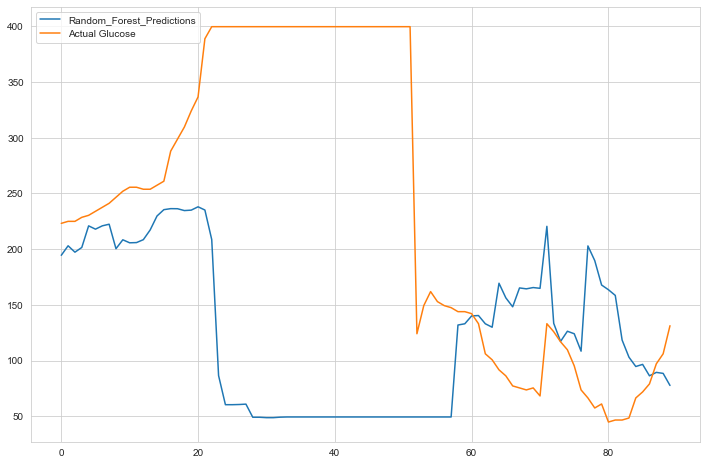

In [11]:
# Random Forest Regressor
pred=rf_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

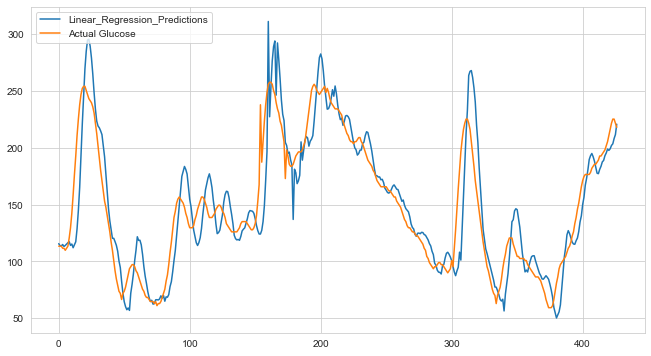

In [12]:
# Linear Regression
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

In [41]:
print(((y_test>200)&(lin_pred>200)).sum())

print((y_train>200).sum())
print((y_test>200).sum())


print((df['glucose']>200).sum())


75
401
98
499


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [15]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 28.739474263454447
Mean Squared Error for Linear Regression Model is: 25.742199497512836


In [16]:
# let's take a look at the actual data in the linear regression predicition df
lin_pred_df = pd.DataFrame(lin_pred)
lin_pred_df.tail()

,0
422,201.873009
423,203.286738
424,207.951095
425,211.410809
426,220.530437
